In [1]:
#필요한 모듈 라이브러리를 불러온다.
import numpy.random as random
import scipy as sp
import scipy.stats as stats
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.font_manager as fm
from pandas import Series, DataFrame

# 시각화 라이브러리
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from statsmodels.graphics.mosaicplot import mosaic

# 그래프를 주피터 노트북에 그리기 위한 설정
%matplotlib inline

# 소수점 3자리까지 표시
%precision 3

#경고 메시지 무시
import warnings
warnings.filterwarnings('ignore')

#코드 숨기기
from IPython.display import HTML

#모델링
import statsmodels.formula.api as smf
import statsmodels.api as sm


Bad key text.latex.preview in file /Users/kwak-yejin/opt/anaconda3/envs/deeplearning/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 123 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.3/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file /Users/kwak-yejin/opt/anaconda3/envs/deeplearning/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 155 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.3/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.jpeg_quality in file /Users/kwak-yejin/opt/anaconda3/envs/deeplearning/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, lin

# 데이터 전처리

In [2]:
result1 = pd.read_csv("data/result1_imputed.csv", sep=",")
result2 = pd.read_csv("data/result2_imputed.csv", sep=",")
result3 = pd.read_csv("data/result3_imputed.csv", sep=",")

In [3]:
result3.head()

,BMI,Weight,age,bending_forward,body_fat,diastolic_bp,grip_power,height,label,measure_time,sex,sit_up,step_inspection,step_recover_time,systolic_bp,scores,match_id,record_id,exercise_prescription
0,21.0,43.8,51.0,18.0,33.9,74.0,12.0,144.5,1,2019.0,0.0,14.0,38.6,78.0,103.0,0.481923,0,2884332,"본운동:한발 연속 뛰기,뒤꿈치 높이들어 뛰기,무릎 높이 들어 뛰기,점프하며 뛰기,메..."
1,25.8,72.6,24.0,3.7,42.1,80.0,19.7,167.8,1,2019.0,0.0,13.0,35.1,108.0,120.0,0.674072,1,2884333,"준비운동:정적 스트레칭 루틴프로그램,동적 스트레칭 루틴프로그램,몸통 들어올리기,팔..."
2,18.8,55.0,25.0,3.6,18.9,80.0,17.4,171.2,1,2019.0,1.0,23.0,54.5,74.0,120.0,0.700150,2,2884334,"준비운동:동적 스트레칭 루틴프로그램 / 본운동:합장하여 앞으로 숙이기,허리숙여 양팔..."
3,25.3,72.2,44.0,-33.0,27.2,97.0,36.2,168.8,1,2019.0,1.0,10.0,45.6,76.0,136.0,0.987517,3,2884335,"준비운동:전신 루틴 스트레칭,한발 앞으로 내밀고 앉았다 일어서기,서서 상체 일으키기..."
4,22.8,59.1,23.0,-29.0,41.1,64.0,12.2,161.0,1,2019.0,0.0,16.0,38.7,102.0,95.0,0.895861,4,2884336,본운동:동적 스트레칭 루틴프로그램


In [4]:
result3.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8838 entries, 0 to 8837
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   BMI                    8838 non-null   float64
 1   Weight                 8838 non-null   float64
 2   age                    8838 non-null   float64
 3   bending_forward        8838 non-null   float64
 4   body_fat               8838 non-null   float64
 5   diastolic_bp           8838 non-null   float64
 6   grip_power             8838 non-null   float64
 7   height                 8838 non-null   float64
 8   label                  8838 non-null   int64  
 9   measure_time           8838 non-null   float64
 10  sex                    8838 non-null   float64
 11  sit_up                 8838 non-null   float64
 12  step_inspection        8838 non-null   float64
 13  step_recover_time      8838 non-null   float64
 14  systolic_bp            8838 non-null   float64
 15  scor

In [5]:
result3[result3["exercise_prescription"].isnull()].index

Int64Index([   9,   10,   23,   25,   29,   34,   38,   42,   48,   55,
            ...
            8828, 8829, 8830, 8831, 8832, 8833, 8834, 8835, 8836, 8837],
           dtype='int64', length=1723)

In [6]:
7115+1164

8279

In [7]:
result3 = result3.drop(result3[result3["exercise_prescription"].isnull()].index, axis=0)
result3 = result3.reset_index(drop=True)
result3

,BMI,Weight,age,bending_forward,body_fat,diastolic_bp,grip_power,height,label,measure_time,sex,sit_up,step_inspection,step_recover_time,systolic_bp,scores,match_id,record_id,exercise_prescription
0,21.0,43.8,51.0,18.00,33.900,74.0,12.000,144.5,1,2019.0,0.0,14.00,38.600,78.00,103.0,0.481923,0,2884332,"본운동:한발 연속 뛰기,뒤꿈치 높이들어 뛰기,무릎 높이 들어 뛰기,점프하며 뛰기,메..."
1,25.8,72.6,24.0,3.70,42.100,80.0,19.700,167.8,1,2019.0,0.0,13.00,35.100,108.00,120.0,0.674072,1,2884333,"준비운동:정적 스트레칭 루틴프로그램,동적 스트레칭 루틴프로그램,몸통 들어올리기,팔..."
2,18.8,55.0,25.0,3.60,18.900,80.0,17.400,171.2,1,2019.0,1.0,23.00,54.500,74.00,120.0,0.700150,2,2884334,"준비운동:동적 스트레칭 루틴프로그램 / 본운동:합장하여 앞으로 숙이기,허리숙여 양팔..."
3,25.3,72.2,44.0,-33.00,27.200,97.0,36.200,168.8,1,2019.0,1.0,10.00,45.600,76.00,136.0,0.987517,3,2884335,"준비운동:전신 루틴 스트레칭,한발 앞으로 내밀고 앉았다 일어서기,서서 상체 일으키기..."
4,22.8,59.1,23.0,-29.00,41.100,64.0,12.200,161.0,1,2019.0,0.0,16.00,38.700,102.00,95.0,0.895861,4,2884336,본운동:동적 스트레칭 루틴프로그램
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7110,29.5,69.8,18.0,2.30,48.000,80.0,15.100,153.8,1,2021.0,0.0,7.00,35.050,109.31,120.0,0.913087,8273,2892605,준비운동:달리기
7111,23.5,69.5,19.0,7.36,18.000,80.0,50.300,172.0,1,2021.0,1.0,39.56,49.908,92.63,120.0,0.242394,8274,2892606,"준비운동:줄넘기 운동,앉았다 일어서기,엉덩이 늘리기,짐볼 운동 루틴프로그램"
7112,25.7,57.8,20.0,-5.00,28.900,80.0,15.100,150.0,1,2021.0,1.0,16.00,45.264,112.70,120.0,0.967285,8275,2892607,"준비운동:하지 루틴 스트레칭1,하지 루틴 스트레칭2,전신 루틴 스트레칭,유산소 운동..."
7113,21.6,59.5,19.0,4.00,24.800,80.0,37.000,166.0,1,2021.0,1.0,37.00,49.168,107.16,120.0,0.403416,8276,2892608,"준비운동:무릎굽혀 원 그리기,네발 걷기,다리 들어올리기,고양이 자세,옆구리 스트레칭..."


In [8]:
result3.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7115 entries, 0 to 7114
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   BMI                    7115 non-null   float64
 1   Weight                 7115 non-null   float64
 2   age                    7115 non-null   float64
 3   bending_forward        7115 non-null   float64
 4   body_fat               7115 non-null   float64
 5   diastolic_bp           7115 non-null   float64
 6   grip_power             7115 non-null   float64
 7   height                 7115 non-null   float64
 8   label                  7115 non-null   int64  
 9   measure_time           7115 non-null   float64
 10  sex                    7115 non-null   float64
 11  sit_up                 7115 non-null   float64
 12  step_inspection        7115 non-null   float64
 13  step_recover_time      7115 non-null   float64
 14  systolic_bp            7115 non-null   float64
 15  scor

In [9]:
for i in range(len(result3)):
    result3['exercise_prescription'][i] = result3['exercise_prescription'][i].replace(" " , "").replace("준비운동" , "준비운동").replace("/본운동" , "|본운동").replace("/마무리운동" , "|마무리운동")
    result3['exercise_prescription'][i] = result3['exercise_prescription'][i].replace("/" , "").replace("|" , "/")

In [10]:
num = list()
for i in range (len(result3)):
    num.append(len(result3['exercise_prescription'][i].replace(" " , "").split('/')))

In [11]:
set(num)

{1, 2, 3}

In [12]:
len(num)

7115

In [13]:
prepare = list()
main = list()
end = list()
for i in range (len(result3)):
    if len(result3['exercise_prescription'][i].replace(" " , "").split('/')) == 1:
        if result3['exercise_prescription'][i].replace(" " , "").split('/')[0][:4] == '준비운동':
            prepare.append(result3['exercise_prescription'][i].replace(" " , "").split('/')[0][5:].split(','))
            main.append([])
            end.append([])
        elif result3['exercise_prescription'][i].replace(" " , "").split('/')[0][:3] == '본운동':
            main.append(result3['exercise_prescription'][i].replace(" " , "").split('/')[0][4:].split(','))
            prepare.append([])
            end.append([])
        else:
            end.append(result3['exercise_prescription'][i].replace(" " , "").split('/')[0][6:].split(','))
            prepare.append([])
            main.append([])

            
    if len(result3['exercise_prescription'][i].replace(" " , "").split('/')) == 2:
        if result3['exercise_prescription'][i].replace(" " , "").split('/')[0][:4] == '준비운동':
            prepare.append(result3['exercise_prescription'][i].replace(" " , "").split('/')[0][5:].split(','))
            if result3['exercise_prescription'][i].replace(" " , "").split('/')[1][:3] == '본운동':
                main.append(result3['exercise_prescription'][i].replace(" " , "").split('/')[0][4:].split(','))
                end.append([])
            else:
                end.append(result3['exercise_prescription'][i].replace(" " , "").split('/')[0][6:].split(','))
                main.append([])
                
        else:
            main.append(result3['exercise_prescription'][i].replace(" " , "").split('/')[0][4:].split(','))
            end.append(result3['exercise_prescription'][i].replace(" " , "").split('/')[1][6:].split(','))
            prepare.append([])
            
    if len(result3['exercise_prescription'][i].replace(" " , "").split('/')) == 3:
        prepare.append(result3['exercise_prescription'][i].replace(" " , "").split('/')[0][5:].split(','))
        main.append(result3['exercise_prescription'][i].replace(" " , "").split('/')[1][4:].split(','))       
        end.append(result3['exercise_prescription'][i].replace(" " , "").split('/')[2][6:].split(','))

In [14]:
prepare

[[],
 ['정적스트레칭루틴프로그램',
  '동적스트레칭루틴프로그램',
  '몸통들어올리기',
  '팔굽혀펴기',
  '팔다리교차버티기',
  '윗몸일으키기',
  '앉았다일어서기',
  '버피테스트',
  '걷기',
  '조깅',
  '자전거타기'],
 ['동적스트레칭루틴프로그램'],
 ['전신루틴스트레칭', '한발앞으로내밀고앉았다일어서기', '서서상체일으키기', '엎드려버티기', '누워서엉덩이들어올리기', '팔굽혀펴기'],
 [],
 ['정적스트레칭루틴프로그램'],
 ['한발앞굽이팔위로뻗어가슴내밀기',
  '다리꼬아상체앞으로숙이기',
  '다리벌려옆으로상체숙이기',
  '다리모아상체숙이기',
  '다리벌려앞으로상체숙이기'],
 ['동적스트레칭루틴프로그램'],
 ['앉아서밴드잡고몸통돌리기', '밴드잡고몸통옆으로굽히기', '바벨들어올리기'],
 ['하지루틴스트레칭1', '상지루틴스트레칭'],
 ['다리벌려옆으로상체숙이기',
  '다리벌려앞으로상체숙이기',
  '발목얹고다리잡아당기기',
  '다리모아상체숙이기',
  '한발뒤로빼고앞으로굽히기',
  '앉아서옆구리늘려주기'],
 ['발목얹고다리잡아당기기', '누워서굽힌다리펴기', '무릎굽혀가슴닿기', '한발뒤로빼고앞으로굽히기'],
 ['관절염을위한스트레칭'],
 ['허리스트레칭', '조깅', '앉았다일어서기'],
 ['동적스트레칭루틴프로그램', '다리벌려옆으로상체숙이기', '다리벌려앞으로상체숙이기', '누워서굽힌다리펴기'],
 ['깍지끼고상체숙이기', '목스트레칭', '회전근개스트레칭', '어깨스트레칭', '넙다리앞쪽스트레칭', '대퇴사두근스트레칭'],
 [],
 [],
 ['왕복달리기', '제자리뛰기', '박스옆으로번갈아뛰기'],
 [],
 ['발목얹고다리잡아당기기', '누워서굽힌다리펴기', '무릎굽혀가슴닿기', '한발뒤로빼고앞으로굽히기'],
 ['동적스트레칭루틴프로그램'],
 [],
 ['무릎굽혀가슴닿기',
  '발바닥마주대고끌어당기기',
  '발목얹고다리잡아당기기',
  '다리벌려앞으로상체숙이기',
  '다

In [15]:
len(prepare)

7115

In [16]:
for i in main:
    if i:
        if i[0][:1]==':':
            i[0] = i[0][1:]

In [17]:
len(main)

7115

In [18]:
for i in end:
    if i:
        if i[0][:1]==':':
            i[0] = i[0][1:]

In [19]:
len(end)

7115

In [20]:
exercise_prepare = set()
for j in range(len(prepare)):
    for i in prepare[j]:
        exercise_prepare.add(i)
len(exercise_prepare)
exercise_prepare = list(exercise_prepare)
exercise_prepare = exercise_prepare[1:]
exercise_prepare

['어깨올리기',
 '짐볼운동루틴프로그램',
 '고정한상태에서덤벨들고팔꿈치굽히기',
 '저항밴드운동루틴프로그램',
 '팔교대로올리기',
 '한발앞으로내밀고앉았다일어서기',
 '넙다리앞쪽스트레칭',
 '의자이용하기',
 '스텝박스',
 '옆으로펀치하기',
 '손목펴기굽히기',
 '합장하여앞으로숙이기',
 '물통으로양팔들어올리기',
 '비복근스트레칭',
 '다리벌려풍차돌기',
 '몸통비틀기',
 '발뒤꿈치들어올리기',
 '결가부좌',
 '마주보고상체좌우비틀기',
 '목굽힘폄II',
 '앞으로나가며앉았다일어서기',
 '척추들어올리기',
 '앉아서당겨내리기',
 '옆으로누워가슴열기',
 '허리스트레칭',
 '탄력밴드이용평형성운동루틴프로그램',
 '다리벌려옆으로상체숙이기',
 '밴드머리뒤로들어올리기',
 '서서발목뒤로당기기',
 '전신루틴스트레칭',
 '고관절스트레칭',
 '몸통앞으로굽혀걷기',
 '팔구부려등모으기',
 '전진점프하며발바닥찍기',
 '발끝당기기',
 '다리모아뒤로눕기',
 '플렉스바비틀기',
 '앉아서엉덩이들고이동하기',
 '골다공증을위한심폐지구력운동',
 '팔꿈치굽히기',
 '손뻗어윗몸일으키기',
 '의자잡고한발들기',
 '아쿠아로빅',
 '콘운동루틴프로그램',
 '의자잡고서기',
 '물병들고한발앞으로내밀고앉았다일어서기',
 '한발로점프하기',
 '메디신볼잡고팔굽혀펴기',
 '누워다리들어올리기',
 '반달자세',
 '계단뛰어오르기',
 '엎드려팔다리교차올리기',
 '누워서하늘자전거',
 '덤벨잡고뒤꿈치들기',
 '벽에서팔굽혀펴기',
 '런지하며상체비틀기',
 '팔굽혀펴기',
 '양팔크게벌리기',
 '50M달리기',
 '뛰어내렸다가바로점프하기',
 '대퇴이두근스트레칭',
 '팔당기기',
 '엎드려서균형잡기',
 '누워무릎교차올리기',
 '정적스트레칭루틴프로그램',
 '다리뻗어상체숙이기',
 '소파를이용한윗몸올리기',
 '바운딩운동루틴프로그램',
 '잔발치기',
 '온몸뻗어주기',
 '고양이자세',
 '몸통스트레칭',
 '머리뒤로깍지끼고상체숙이기',
 '

In [21]:
exercise_main = set()
for j in range(len(main)):
    for i in main[j]:
        exercise_main.add(i)
len(exercise_main)
exercise_main = list(exercise_main)
exercise_main = exercise_main[1:]
exercise_main

['짐볼운동루틴프로그램',
 '고정한상태에서덤벨들고팔꿈치굽히기',
 '어깨올리기',
 '저항밴드운동루틴프로그램',
 '아쿠아로빅-옆구리늘리기',
 '한발앞으로내밀고앉았다일어서기',
 '넙다리앞쪽스트레칭',
 '의자이용하기',
 '사다리걷기',
 '짐볼이용평형성루틴프로그램',
 '아쿠아로빅-물누르기올리기',
 '스텝박스',
 '옆으로펀치하기',
 '손목펴기굽히기',
 '합장하여앞으로숙이기',
 '물통으로양팔들어올리기',
 '비복근스트레칭',
 '다리벌려풍차돌기',
 '몸통비틀기',
 '발뒤꿈치들어올리기',
 '결가부좌',
 '몸기울이기회전하기',
 '마주보고상체좌우비틀기',
 '목굽힘폄II',
 '탄력밴드전방으로당기기',
 '연속상향점프하기',
 '누워무릎기울기',
 '척추들어올리기',
 '발로공주고받기',
 '앉아서당겨내리기',
 '물당기기밀기',
 '옆으로누워가슴열기',
 '허리스트레칭',
 '밴드머리뒤로들어올리기',
 '다리벌려옆으로상체숙이기',
 '서서발목뒤로당기기',
 '전신루틴스트레칭',
 '고관절스트레칭',
 '계단두칸씩뛰기',
 '몸통앞으로굽혀걷기',
 '팔구부려등모으기',
 '전진점프하며발바닥찍기',
 '발끝당기기',
 '다리모아뒤로눕기',
 '플렉스바비틀기',
 '앉아서엉덩이들고이동하기',
 '팔꿈치굽히기',
 '손뻗어윗몸일으키기',
 '요통을위한스트레칭2',
 '의자잡고한발들기',
 '빠른발안팎뛰기',
 '관절염을위한심폐지구력운동',
 '아쿠아로빅',
 '콘운동루틴프로그램',
 '뒷발의자올려굽히기',
 '앞뒤지그재그뛰기',
 '의자잡고서기',
 '물병들고한발앞으로내밀고앉았다일어서기',
 '한발로점프하기',
 '누워한발원그리기',
 '팔굽혀펴기(무릎대고실시)',
 '머리위로공넘기기',
 '메디신볼잡고팔굽혀펴기',
 '누워다리들어올리기',
 '반달자세',
 '비스듬히누워서밀기',
 '뒤로팔뻗기',
 '아령뒤로들어올리기',
 '계단뛰어오르기',
 '연속사이드스쿼드',
 '엎드려팔다리교차올리기',
 '누워서하늘자전거',
 '덤벨잡고뒤꿈치들기',
 '

In [22]:
exercise_end = set()
for j in range(len(end)):
    for i in end[j]:
        exercise_end.add(i)
len(exercise_end)
exercise_end = list(exercise_end)
exercise_end = exercise_end[1:]
exercise_end

['어깨뒤쪽스트레칭',
 '휴식자세',
 '엎드려상체들어올리기',
 '허리숙여양팔돌리기',
 '의자잡고팔뒤로굽히기',
 '팔교대로올리기',
 '엎드려양팔및다리들어올리기',
 '앉아서한발앞으로굽히기',
 '측면팔대고버티기',
 '신루틴스트레칭',
 '넙다리앞쪽스트레칭',
 '발목얹고다리잡아당기기',
 '의자이용하기',
 '1단줄넘기',
 '물고기자세',
 '옆으로펀치하기',
 '손목펴기굽히기',
 '합장하여앞으로숙이기',
 '스텝퍼올라가서점프하여착지하기',
 '비복근스트레칭',
 '다리모아무릎누르기',
 '아기자세',
 '몸통비틀기',
 '래팔스트레칭',
 '회전근개스트레칭',
 '옆구리늘리기',
 '결가부좌',
 '몸기울이기회전하기',
 '몸통들어올리기',
 '마주보고상체좌우비틀기',
 '사다리안팎뛰기',
 '하지루틴스트레칭2',
 '넙다리안쪽스트레칭',
 '짐볼에다리올리고엉덩이들어올리기',
 '폼롤러이용유연성운동루틴프로그램',
 '앞차기하며뛰기',
 '리굽혀덤벨뒤로들기',
 '척추들어올리기',
 '물속에서걷기',
 '좌식생활자를위한동적루틴스트레칭',
 '덤벨옆으로들어올리기',
 '다리꼬아상체앞으로숙이기',
 '옆으로누워가슴열기',
 '허리스트레칭',
 '나란히서서손잡고끌어당기기',
 '다리벌려옆으로상체숙이기',
 '발목돌리기',
 '서서발목뒤로당기기',
 '무릎당겨올리기',
 '전갈자세',
 '좌우로선넘기',
 '앉은산자세',
 '전신루틴스트레칭',
 '엉덩이늘리기',
 '발바닥마주대고끌어당기기',
 '팔꿈치원그리기',
 '줄넘기운동',
 '고관절스트레칭',
 '앞굽이뛰기',
 '몸통앞으로굽혀걷기',
 '소머리자세',
 '앉아서상체앞옆으로기울기',
 '버피운동',
 '스타투니풀',
 '전진점프하며발바닥찍기',
 '발끝당기기',
 '적스트레칭루틴프로그램',
 '양팔벌려전신비틀기',
 '의자이용중심잡기루틴운동',
 '다리모아뒤로눕기',
 '제자리뛰기',
 '앉아서덤벨로손목굽히기',
 '사다리좌우뛰기',
 '의자에앉아볼돌리기',
 '실내자전거타기',
 '엉덩이스트

In [23]:
len(exercise_end)

221

In [24]:
p = [[0]*len(exercise_prepare) for i in range(len(result3))]
m = [[0]*len(exercise_main) for i in range(len(result3))]
e = [[0]*len(exercise_end) for i in range(len(result3))]

In [25]:
for j in range(len(exercise_prepare)):
    for i in range (len(result3)):
        if exercise_prepare[j] in prepare[i]:
            p[i][j]=1

In [26]:
for j in range(len(exercise_main)):
    for i in range (len(result3)):
        if exercise_main[j] in main[i]:
            m[i][j]=1

In [27]:
for j in range(len(exercise_end)):
    for i in range (len(result3)):
        if exercise_end[j] in end[i]:
            e[i][j]=1

In [28]:
p = pd.DataFrame(p)
m = pd.DataFrame(m)
e = pd.DataFrame(e)

In [29]:
p.columns = exercise_prepare
m.columns = exercise_main
e.columns = exercise_end

In [30]:
exercise_prepare

['어깨올리기',
 '짐볼운동루틴프로그램',
 '고정한상태에서덤벨들고팔꿈치굽히기',
 '저항밴드운동루틴프로그램',
 '팔교대로올리기',
 '한발앞으로내밀고앉았다일어서기',
 '넙다리앞쪽스트레칭',
 '의자이용하기',
 '스텝박스',
 '옆으로펀치하기',
 '손목펴기굽히기',
 '합장하여앞으로숙이기',
 '물통으로양팔들어올리기',
 '비복근스트레칭',
 '다리벌려풍차돌기',
 '몸통비틀기',
 '발뒤꿈치들어올리기',
 '결가부좌',
 '마주보고상체좌우비틀기',
 '목굽힘폄II',
 '앞으로나가며앉았다일어서기',
 '척추들어올리기',
 '앉아서당겨내리기',
 '옆으로누워가슴열기',
 '허리스트레칭',
 '탄력밴드이용평형성운동루틴프로그램',
 '다리벌려옆으로상체숙이기',
 '밴드머리뒤로들어올리기',
 '서서발목뒤로당기기',
 '전신루틴스트레칭',
 '고관절스트레칭',
 '몸통앞으로굽혀걷기',
 '팔구부려등모으기',
 '전진점프하며발바닥찍기',
 '발끝당기기',
 '다리모아뒤로눕기',
 '플렉스바비틀기',
 '앉아서엉덩이들고이동하기',
 '골다공증을위한심폐지구력운동',
 '팔꿈치굽히기',
 '손뻗어윗몸일으키기',
 '의자잡고한발들기',
 '아쿠아로빅',
 '콘운동루틴프로그램',
 '의자잡고서기',
 '물병들고한발앞으로내밀고앉았다일어서기',
 '한발로점프하기',
 '메디신볼잡고팔굽혀펴기',
 '누워다리들어올리기',
 '반달자세',
 '계단뛰어오르기',
 '엎드려팔다리교차올리기',
 '누워서하늘자전거',
 '덤벨잡고뒤꿈치들기',
 '벽에서팔굽혀펴기',
 '런지하며상체비틀기',
 '팔굽혀펴기',
 '양팔크게벌리기',
 '50M달리기',
 '뛰어내렸다가바로점프하기',
 '대퇴이두근스트레칭',
 '팔당기기',
 '엎드려서균형잡기',
 '누워무릎교차올리기',
 '정적스트레칭루틴프로그램',
 '다리뻗어상체숙이기',
 '소파를이용한윗몸올리기',
 '바운딩운동루틴프로그램',
 '잔발치기',
 '온몸뻗어주기',
 '고양이자세',
 '몸통스트레칭',
 '머리뒤로깍지끼고상체숙이기',
 '

In [31]:
drop_prepare = list()
for i in range(len(exercise_prepare)):
    if (len(p[exercise_prepare[i]][p[exercise_prepare[i]] == 1]) < 2):
        print(exercise_prepare[i],i)
        drop_prepare.append(exercise_prepare[i])

어깨올리기 0
옆으로펀치하기 9
앉아서엉덩이들고이동하기 37
콘운동루틴프로그램 43
한발로점프하기 46
엎드려팔다리교차올리기 51
양팔크게벌리기 57
뛰어밀기 112
팔굽혀펴기후점프하기 118
앞차기하며뛰기 121
사이드스텝 128
한발서서균형잡기 180
앞발들어올리기 185
짐볼배에대고버티기 190
스텝퍼올라가서점프하여착지하기 191
다리앞뒤로벌려굽혔다펴기 238
상체감아올리기 252
마주보고종아리펴기 262
밴드앞으로당기기 285
스텝퍼뛰어서넘어가기 296
앉았다일어나며점프하기 312
아령앞으로들어올리기 315
옆구리늘리기 319
파워클린 326
밴드잡고무릎펴기 331
누워서덤벨들어올리기 357
덤벨잡고한발내밀어굽혔다펴기 390
짐볼윗몸일으키기 392
누워서공뒤로내리고당기기 394
슈퍼맨자세 416
점프하며뛰기 421


In [32]:
drop_main = list()
for i in range(len(exercise_main)):
    if (len(m[exercise_main[i]][m[exercise_main[i]] == 1]) < 2):
        print(exercise_main[i],i)
        drop_main.append(exercise_main[i])

아쿠아로빅-옆구리늘리기 4
목굽힘폄II 23
50M달리기 80
훌라후프로공끌고가기 83
짐볼앉기 92
물누르기올리기 110
뛰어밀기 155
짐볼양팔로밀기 171
누워서뒤로팔굽혀펴기 227
한발앞뒤교차뛰기 420


In [33]:
drop_end = list()
for i in range(len(exercise_end)):
    if (len(e[exercise_end[i]][e[exercise_end[i]] == 1]) < 2):
        print(exercise_end[i],i)
        drop_end.append(exercise_end[i])

의자잡고팔뒤로굽히기 4
손목펴기굽히기 16
짐볼에다리올리고엉덩이들어올리기 33
리굽혀덤벨뒤로들기 36
덤벨옆으로들어올리기 40
스타투니풀 63
의자에앉아볼돌리기 73
치매를위한스트레칭(의자) 84
골다공증을위한스트레칭 86
아령뒤로들어올리기 88
의자이용유연성운동루틴프로그램 101
엉덩관절회전하기 102
레그스윙 103
짐볼들고양옆으로돌리기 141
전진점프하며발뒤꿈치찍기 145
짐볼에다리올리고좌우로움직이기 148
계단두발뛰기 163
엎드려한발원그리기 209


In [34]:
p = p.drop(drop_prepare,axis=1)
m = m.drop(drop_main,axis=1)
e = e.drop(drop_end,axis=1)

In [35]:
p

,짐볼운동루틴프로그램,고정한상태에서덤벨들고팔꿈치굽히기,저항밴드운동루틴프로그램,팔교대로올리기,한발앞으로내밀고앉았다일어서기,넙다리앞쪽스트레칭,의자이용하기,스텝박스,손목펴기굽히기,합장하여앞으로숙이기,...,옆으로팔벌리며점프하기,무릎들어올리기,뒤꿈치높이들어뛰기,가슴어깨스트레칭,앉았다일어서기,어깨양옆으로돌리기,겨드랑이늘리기,한쪽다리펴고상체숙이기,몸앞으로굽히기,발에밴드걸고윗몸일으키기
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7110,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7111,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
7112,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7113,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
m

,짐볼운동루틴프로그램,고정한상태에서덤벨들고팔꿈치굽히기,어깨올리기,저항밴드운동루틴프로그램,한발앞으로내밀고앉았다일어서기,넙다리앞쪽스트레칭,의자이용하기,사다리걷기,짐볼이용평형성루틴프로그램,아쿠아로빅-물누르기올리기,...,목봉잡고앉았다일어나기,앉았다일어서기,어깨양옆으로돌리기,슈퍼맨자세,겨드랑이늘리기,한쪽다리펴고상체숙이기,몸앞으로굽히기,발에밴드걸고윗몸일으키기,협응력향상프로그램_계이름치기,점프하며뛰기
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7110,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7111,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7112,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
7113,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [37]:
e

,어깨뒤쪽스트레칭,휴식자세,엎드려상체들어올리기,허리숙여양팔돌리기,팔교대로올리기,엎드려양팔및다리들어올리기,앉아서한발앞으로굽히기,측면팔대고버티기,신루틴스트레칭,넙다리앞쪽스트레칭,...,겨드랑이늘리기,요가및필라테스루틴프로그램,목스트레칭,가슴어깨앞쪽스트레칭,발등동시에늘리기,모관운동,다리자세,몸앞으로굽히기,무릎대고옆으로기울이기,슴어깨앞쪽스트레칭
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7110,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7111,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7112,0,0,0,0,0,0,0,0,0,1,...,0,0,1,1,0,0,0,0,0,0
7113,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Random Forest

## 준비운동

In [38]:
train = result3[['BMI','Weight','age','bending_forward','body_fat','diastolic_bp','grip_power','height','measure_time','sex','sit_up','step_inspection','step_recover_time','systolic_bp']]
label = p

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.preprocessing import StandardScaler

In [40]:
from sklearn.ensemble import RandomForestClassifier

In [41]:
model_list=[]
met=[]

In [42]:
for i in range(len(p.columns)):
    train_features, test_features, train_labels, test_labels = train_test_split(train, label[p.columns[i]], random_state=42, stratify=label[p.columns[i]])
    scaler = StandardScaler()  
    train_features = scaler.fit_transform(train_features)  
    test_features = scaler.transform(test_features)
    
    model = RandomForestClassifier()
    model.fit(train_features, train_labels)
    
    train_predict = model.predict(train_features) 
    test_predict =  model.predict(test_features)

    acc = accuracy_score(test_labels, test_predict)
    precision = precision_score(test_labels, test_predict)
    recall = recall_score(test_labels, test_predict)
    f1 = f1_score(test_labels, test_predict)
    mcc = matthews_corrcoef(test_labels, test_predict)

    test_score = model.score(test_features, test_labels)

    met.append([acc, precision, recall, f1, mcc,test_score])

    #test set 혼동행렬
    #print(confusion_matrix(test_labels, test_predict))
    #print("test_score: ",test_score, "\n")

    model_list.append(model)

In [43]:
mett = [[],[],[],[],[],[]]
for i in range(len(met)):
  mett[0].append(met[i][0])
  mett[1].append(met[i][1])
  mett[2].append(met[i][2])
  mett[3].append(met[i][3])
  mett[4].append(met[i][4])
  mett[5].append(met[i][5])

print('Average acc: ', np.mean(mett[0]))
print('Average precision: ', np.mean(mett[1])) 
print('Average recall: ', np.mean(mett[2]))  
print('Average f1: ', np.mean(mett[3]))
print('Average mcc: ', np.mean(mett[4])) 
print('Average test score: ', np.mean(mett[5]))

Average acc:  0.9904038160465446
Average precision:  0.005099357745283623
Average recall:  0.002147702269923303
Average f1:  0.002996960492848357
Average mcc:  -0.0009723443291495876
Average test score:  0.9904038160465446


In [44]:
for i in range(len(p.columns)):
    if p.iloc[1][i] == 1:
        print(i,p.columns[i])

50 팔굽혀펴기
57 정적스트레칭루틴프로그램
100 팔다리교차버티기
145 조깅
167 걷기
179 몸통들어올리기
197 윗몸일으키기
257 동적스트레칭루틴프로그램
298 버피테스트
375 자전거타기
385 앉았다일어서기


In [45]:
Jack = np.array([19.3,43.2,49.0,-10.0,36.0,88.0,11.1,149.8,2019.0,1.0,6.0,47.400,89.00,133.0])
Rose = np.array([18.5,48.7,47.0,-3.0,21.5,100.0,6.0,162.4,2019.0,1.0,13.0,47.400,91.00,139.0])
ME = np.array([22.5,66.3,26.0,-0.2,20.4,77.0,22.4,171.6,2019.0,1.0,15.0,46.2,112.0,122.0])
ME2 = np.array([20.5,64.3,40.0,-1.0,35.4,100.0,5.4,170.4,2019.0,1.0,12.0,43.6,119.0,130.0])
human = np.array([Jack, Rose, ME,ME2])

In [46]:
#.reshape(1,-1)
human = scaler.transform(human)

In [47]:
for i in range(len(model_list)):
    if (model_list[i].predict(human[1].reshape(1, -1))==1):
        print(p.columns[i]+" 운동이 필요합니다")

## 본운동

In [48]:
label=m
model_list2=[]
met2=[]

for i in range(len(m.columns)):
    train_features, test_features, train_labels, test_labels = train_test_split(train, label[m.columns[i]], random_state=42, stratify=label[m.columns[i]])
    scaler = StandardScaler()  
    train_features = scaler.fit_transform(train_features)  
    test_features = scaler.transform(test_features)
    
    model = RandomForestClassifier()
    model.fit(train_features, train_labels)
    
    test_predict =  model.predict(test_features)

    acc = accuracy_score(test_labels, test_predict)
    precision = precision_score(test_labels, test_predict)
    recall = recall_score(test_labels, test_predict)
    f1 = f1_score(test_labels, test_predict)
    mcc = matthews_corrcoef(test_labels, test_predict)

    test_score = model.score(test_features, test_labels)

    met2.append([acc,precision,recall,f1,mcc,test_score])

    #test set 혼동행렬
    #print(confusion_matrix(test_labels, test_predict))
    #print("test_score: ",test_score, "\n")

    model_list2.append(model)

In [49]:
mett2 = [[],[],[],[],[],[]]
for i in range(len(met2)):
  mett2[0].append(met2[i][0])
  mett2[1].append(met2[i][1])
  mett2[2].append(met2[i][2])
  mett2[3].append(met2[i][3])
  mett2[4].append(met2[i][4])
  mett2[5].append(met2[i][5])

print('Average acc: ', np.mean(mett2[0]))
print('Average precision: ', np.mean(mett2[1])) 
print('Average recall: ', np.mean(mett2[2]))  
print('Average f1: ', np.mean(mett2[3]))
print('Average mcc: ', np.mean(mett2[4])) 
print('Average test score: ', np.mean(mett2[5]))

Average acc:  0.986445147837867
Average precision:  0.008952660302307356
Average recall:  0.003646317400178911
Average f1:  0.005067470756162912
Average mcc:  -0.0004970825897753291
Average test score:  0.986445147837867


## 마무리운동

In [50]:
label=e
model_list3=[]
met3=[[],[],[],[],[],[]]

for i in range(len(e.columns)):
    train_features, test_features, train_labels, test_labels = train_test_split(train, label[e.columns[i]], random_state=42, stratify=label[e.columns[i]])
    scaler = StandardScaler()  
    train_features = scaler.fit_transform(train_features)  
    test_features = scaler.transform(test_features)
    
    model = RandomForestClassifier()
    model.fit(train_features, train_labels)
     
    test_predict =  model.predict(test_features)

    acc = accuracy_score(test_labels, test_predict)
    precision = precision_score(test_labels, test_predict)
    recall = recall_score(test_labels, test_predict)
    f1 = f1_score(test_labels, test_predict)
    mcc = matthews_corrcoef(test_labels, test_predict)

    test_score = model.score(test_features, test_labels)

    met3[0].append(acc)
    met3[1].append(precision)
    met3[2].append(recall)
    met3[3].append(f1)
    met3[4].append(mcc)
    met3[5].append(test_score)

    model_list3.append(model)

In [51]:
print('Average acc: ', np.mean(met3[0]))
print('Average precision: ', np.mean(met3[1])) 
print('Average recall: ', np.mean(met3[2]))  
print('Average f1: ', np.mean(met3[3]))
print('Average mcc: ', np.mean(met3[4])) 
print('Average test score: ', np.mean(met3[5]))

Average acc:  0.9905769832501239
Average precision:  0.004605640224033951
Average recall:  0.001882793987182386
Average f1:  0.002595839174644972
Average mcc:  -0.0013059081613589138
Average test score:  0.9905769832501239


## Random Forest의 test score

In [52]:
print(min(mett[5]), max(mett[5]), np.mean(mett[5]), np.median(mett[5]))
print(min(mett2[5]), max(mett2[5]), np.mean(mett2[5]), np.median(mett2[5]))
print(min(met3[5]), max(met3[5]), np.mean(met3[5]), np.median(met3[5]))

0.8021360314783587 0.9994378864530635 0.9904038160465446 0.9971894322653176
0.7268128161888702 0.9994378864530635 0.986445147837867 0.9949409780775716
0.7948285553681844 0.9994378864530635 0.9905769832501239 0.9971894322653176


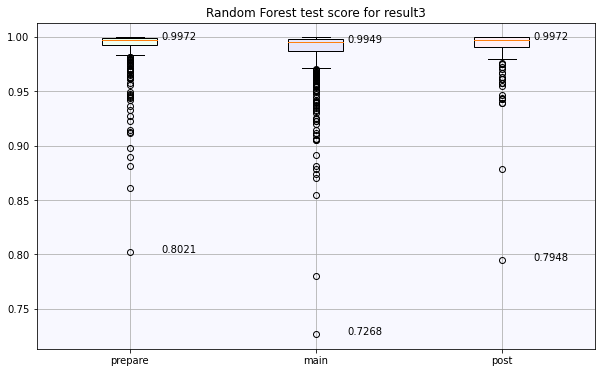

In [53]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(facecolor='ghostwhite')
bp = ax.boxplot([mett[5], mett2[5], met3[5]], patch_artist=True)
colors=['honeydew','lavender','lavenderblush']
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

plt.text(1.17,np.median(mett[5]),format(np.median(mett[5]),'.4f'))
plt.text(2.17,np.median(mett2[5]),format(np.median(mett2[5]),'.4f'))
plt.text(3.17,np.median(met3[5]),format(np.median(met3[5]),'.4f'))
plt.text(1.17,min(mett[5]),format(min(mett[5]),'.4f'))
plt.text(2.17,min(mett2[5]),format(min(mett2[5]),'.4f'))
plt.text(3.17,min(met3[5]),format(min(met3[5]),'.4f'))
# plt.text(1.17,np.mean(mett[5]),format(np.mean(mett[5]),'.4f'))
# plt.text(2.17,np.mean(mett2[5]),format(np.mean(mett2[5]),'.4f'))
# plt.text(3.17,np.mean(met3[5]),format(np.mean(met3[5]),'.4f'))


plt.title('Random Forest test score for result3')
plt.xticks([1,2,3],['prepare','main','post'])
plt.grid(True)
plt.show()

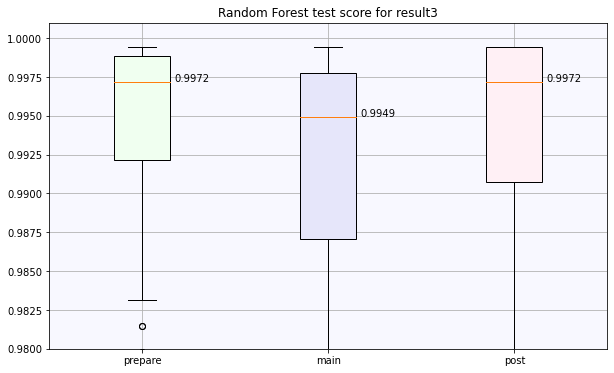

In [54]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(facecolor='ghostwhite')
bp = ax.boxplot([mett[5], mett2[5], met3[5]], patch_artist=True)
colors=['honeydew','lavender','lavenderblush']
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
plt.title('Random Forest test score for result3')
plt.xticks([1,2,3],['prepare','main','post'])

plt.text(1.17,np.median(mett[5]),format(np.median(mett[5]),'.4f'))
plt.text(2.17,np.median(mett2[5]),format(np.median(mett2[5]),'.4f'))
plt.text(3.17,np.median(met3[5]),format(np.median(met3[5]),'.4f'))

ax.set_ylim(0.98,1.001)
plt.grid(True)
plt.show()

# XGBOOST

In [55]:
from xgboost import XGBClassifier

## 준비운동

In [56]:
label = p
xgb_list=[]
xgb_met=[[],[],[],[],[],[]]

for i in range(len(p.columns)):
    train_features, test_features, train_labels, test_labels = train_test_split(train, label[p.columns[i]], stratify=label[p.columns[i]])
    scaler = StandardScaler()  
    train_features = scaler.fit_transform(train_features)  
    test_features = scaler.transform(test_features)
    
    model = XGBClassifier(random_state=222)
    model.fit(train_features, train_labels)
     
    test_predict =  model.predict(test_features)

    acc = accuracy_score(test_labels, test_predict)
    precision = precision_score(test_labels, test_predict)
    recall = recall_score(test_labels, test_predict)
    f1 = f1_score(test_labels, test_predict)
    mcc = matthews_corrcoef(test_labels, test_predict)

    test_score = model.score(test_features, test_labels)

    xgb_met[0].append(acc)
    xgb_met[1].append(precision)
    xgb_met[2].append(recall)
    xgb_met[3].append(f1)
    xgb_met[4].append(mcc)
    xgb_met[5].append(test_score)

    xgb_list.append(model)

In [57]:
print('Average acc: ', np.mean(xgb_met[0]))
print('Average precision: ', np.mean(xgb_met[1])) 
print('Average recall: ', np.mean(xgb_met[2]))  
print('Average f1: ', np.mean(xgb_met[3]))
print('Average mcc: ', np.mean(xgb_met[4])) 
print('Average test score: ', np.mean(xgb_met[5]))

Average acc:  0.9905978961714461
Average precision:  0.004484914112044646
Average recall:  0.0018636875785845422
Average f1:  0.0026131097350875826
Average mcc:  -0.0011936175843717518
Average test score:  0.9905978961714461


## 본운동

In [58]:
label = m
xgb_list2=[]
xgb_met2=[[],[],[],[],[],[]]

for i in range(len(m.columns)):
    train_features, test_features, train_labels, test_labels = train_test_split(train, label[m.columns[i]], random_state=42, stratify=label[m.columns[i]])
    scaler = StandardScaler()  
    train_features = scaler.fit_transform(train_features)  
    test_features = scaler.transform(test_features)
    
    model = XGBClassifier(random_state=222)
    model.fit(train_features, train_labels)
     
    test_predict =  model.predict(test_features)

    acc = accuracy_score(test_labels, test_predict)
    precision = precision_score(test_labels, test_predict)
    recall = recall_score(test_labels, test_predict)
    f1 = f1_score(test_labels, test_predict)
    mcc = matthews_corrcoef(test_labels, test_predict)

    test_score = model.score(test_features, test_labels)

    xgb_met2[0].append(acc)
    xgb_met2[1].append(precision)
    xgb_met2[2].append(recall)
    xgb_met2[3].append(f1)
    xgb_met2[4].append(mcc)
    xgb_met2[5].append(test_score)

    xgb_list2.append(model)

In [59]:
print('Average acc: ', np.mean(xgb_met2[0]))
print('Average precision: ', np.mean(xgb_met2[1])) 
print('Average recall: ', np.mean(xgb_met2[2]))  
print('Average f1: ', np.mean(xgb_met2[3]))
print('Average mcc: ', np.mean(xgb_met2[4])) 
print('Average test score: ', np.mean(xgb_met2[5]))

Average acc:  0.9865633820598606
Average precision:  0.00906089843252203
Average recall:  0.003642685834276823
Average f1:  0.005087836070681281
Average mcc:  -0.00035307041987383647
Average test score:  0.9865633820598606


## 마무리운동

In [60]:
label = e
xgb_list3=[]
xgb_met3=[[],[],[],[],[],[]]

for i in range(len(e.columns)):
    train_features, test_features, train_labels, test_labels = train_test_split(train, label[e.columns[i]], random_state=42, stratify=label[e.columns[i]])
    scaler = StandardScaler()  
    train_features = scaler.fit_transform(train_features)  
    test_features = scaler.transform(test_features)
    
    model = XGBClassifier(random_state=222)
    model.fit(train_features, train_labels)
     
    test_predict =  model.predict(test_features)

    acc = accuracy_score(test_labels, test_predict)
    precision = precision_score(test_labels, test_predict)
    recall = recall_score(test_labels, test_predict)
    f1 = f1_score(test_labels, test_predict)
    mcc = matthews_corrcoef(test_labels, test_predict)

    test_score = model.score(test_features, test_labels)

    xgb_met3[0].append(acc)
    xgb_met3[1].append(precision)
    xgb_met3[2].append(recall)
    xgb_met3[3].append(f1)
    xgb_met3[4].append(mcc)
    xgb_met3[5].append(test_score)

    xgb_list3.append(model)

In [61]:
print('Average acc: ', np.mean(xgb_met3[0]))
print('Average precision: ', np.mean(xgb_met3[1])) 
print('Average recall: ', np.mean(xgb_met3[2]))  
print('Average f1: ', np.mean(xgb_met3[3]))
print('Average mcc: ', np.mean(xgb_met3[4])) 
print('Average test score: ', np.mean(xgb_met3[5]))

Average acc:  0.9907292800239246
Average precision:  0.005327704871615183
Average recall:  0.0020098204941748038
Average f1:  0.0028288063904518016
Average mcc:  -0.000861882708602931
Average test score:  0.9907292800239246


## XGBOOST의 test score

In [62]:
print(min(xgb_met[5]), max(xgb_met[5]), np.mean(xgb_met[5]), np.median(xgb_met[5]))
print(min(xgb_met2[5]), max(xgb_met2[5]), np.mean(xgb_met2[5]), np.median(xgb_met2[5]))
print(min(xgb_met3[5]), max(xgb_met3[5]), np.mean(xgb_met3[5]), np.median(xgb_met3[5]))

0.822372119168072 0.9994378864530635 0.9905978961714461 0.9971894322653176
0.729061270376616 0.9994378864530635 0.9865633820598606 0.9949409780775716
0.8043844856661045 0.9994378864530635 0.9907292800239246 0.9977515458122541


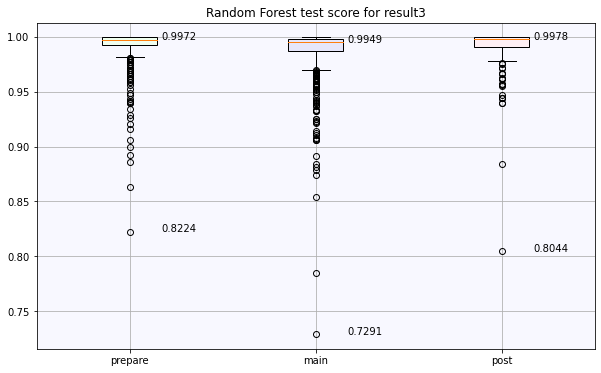

In [63]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(facecolor='ghostwhite')
bp = ax.boxplot([xgb_met[5], xgb_met2[5], xgb_met3[5]], patch_artist=True)
colors=['honeydew','lavender','lavenderblush']
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

plt.text(1.17,np.median(xgb_met[5]),format(np.median(xgb_met[5]),'.4f'))
plt.text(2.17,np.median(xgb_met2[5]),format(np.median(xgb_met2[5]),'.4f'))
plt.text(3.17,np.median(xgb_met3[5]),format(np.median(xgb_met3[5]),'.4f'))
plt.text(1.17,min(xgb_met[5]),format(min(xgb_met[5]),'.4f'))
plt.text(2.17,min(xgb_met2[5]),format(min(xgb_met2[5]),'.4f'))
plt.text(3.17,min(xgb_met3[5]),format(min(xgb_met3[5]),'.4f'))

plt.title('Random Forest test score for result3')
plt.xticks([1,2,3],['prepare','main','post'])
plt.grid(True)
plt.show()

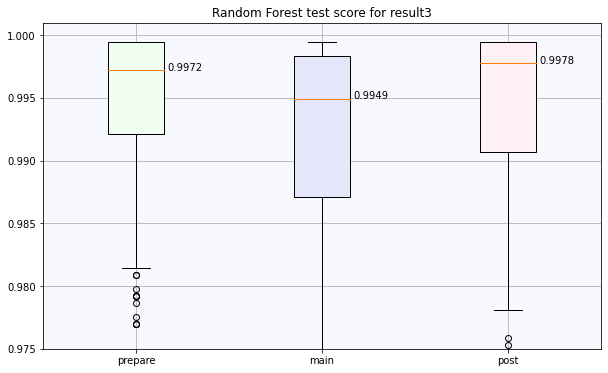

In [64]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(facecolor='ghostwhite')
bp = ax.boxplot([xgb_met[5], xgb_met2[5], xgb_met3[5]], patch_artist=True)
colors=['honeydew','lavender','lavenderblush']
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

plt.text(1.17,np.median(xgb_met[5]),format(np.median(xgb_met[5]),'.4f'))
plt.text(2.17,np.median(xgb_met2[5]),format(np.median(xgb_met2[5]),'.4f'))
plt.text(3.17,np.median(xgb_met3[5]),format(np.median(xgb_met3[5]),'.4f'))

plt.title('Random Forest test score for result3')
plt.xticks([1,2,3],['prepare','main','post'])
ax.set_ylim(0.975,1.001)
plt.grid(True)
plt.show()

# LGBM

In [65]:
import lightgbm as lgb

## 준비운동

In [66]:
label = p
lgbm_list=[]
lgbm_met=[[],[],[],[],[],[]]

for i in range(len(p.columns)):
    train_features, test_features, train_labels, test_labels = train_test_split(train, label[p.columns[i]], stratify=label[p.columns[i]])
    scaler = StandardScaler()  
    train_features = scaler.fit_transform(train_features)  
    test_features = scaler.transform(test_features)
    
    model = lgb.LGBMClassifier()
    model.fit(train_features, train_labels)
     
    test_predict =  model.predict(test_features)

    acc = accuracy_score(test_labels, test_predict)
    precision = precision_score(test_labels, test_predict)
    recall = recall_score(test_labels, test_predict)
    f1 = f1_score(test_labels, test_predict)
    mcc = matthews_corrcoef(test_labels, test_predict)

    test_score = model.score(test_features, test_labels)

    lgbm_met[0].append(acc)
    lgbm_met[1].append(precision)
    lgbm_met[2].append(recall)
    lgbm_met[3].append(f1)
    lgbm_met[4].append(mcc)
    lgbm_met[5].append(test_score)

    lgbm_list.append(model)

In [67]:
print('Average acc: ', np.mean(lgbm_met[0]))
print('Average precision: ', np.mean(lgbm_met[1])) 
print('Average recall: ', np.mean(lgbm_met[2]))  
print('Average f1: ', np.mean(lgbm_met[3]))
print('Average mcc: ', np.mean(lgbm_met[4])) 
print('Average test score: ', np.mean(lgbm_met[5]))

Average acc:  0.9885593360447046
Average precision:  0.004596083659160783
Average recall:  0.006733050821674689
Average f1:  0.0024221633920359534
Average mcc:  -0.0010890948134260063
Average test score:  0.9885593360447046


## 본운동

In [68]:
label = m
lgbm_list2=[]
lgbm_met2=[[],[],[],[],[],[]]

for i in range(len(m.columns)):
    train_features, test_features, train_labels, test_labels = train_test_split(train, label[m.columns[i]], stratify=label[m.columns[i]])
    scaler = StandardScaler()  
    train_features = scaler.fit_transform(train_features)  
    test_features = scaler.transform(test_features)
    
    model = lgb.LGBMClassifier()
    model.fit(train_features, train_labels)
     
    test_predict =  model.predict(test_features)

    acc = accuracy_score(test_labels, test_predict)
    precision = precision_score(test_labels, test_predict)
    recall = recall_score(test_labels, test_predict)
    f1 = f1_score(test_labels, test_predict)
    mcc = matthews_corrcoef(test_labels, test_predict)

    test_score = model.score(test_features, test_labels)

    lgbm_met2[0].append(acc)
    lgbm_met2[1].append(precision)
    lgbm_met2[2].append(recall)
    lgbm_met2[3].append(f1)
    lgbm_met2[4].append(mcc)
    lgbm_met2[5].append(test_score)

    lgbm_list2.append(model)

In [69]:
print('Average acc: ', np.mean(lgbm_met2[0]))
print('Average precision: ', np.mean(lgbm_met2[1])) 
print('Average recall: ', np.mean(lgbm_met2[2]))  
print('Average f1: ', np.mean(lgbm_met2[3]))
print('Average mcc: ', np.mean(lgbm_met2[4])) 
print('Average test score: ', np.mean(lgbm_met2[5]))

Average acc:  0.9865022609789993
Average precision:  0.008297675668062752
Average recall:  0.0028939252121343018
Average f1:  0.0041555212455309685
Average mcc:  -0.000799280935547249
Average test score:  0.9865022609789993


## 마무리운동

In [70]:
label = e
lgbm_list3=[]
lgbm_met3=[[],[],[],[],[],[]]

for i in range(len(e.columns)):
    train_features, test_features, train_labels, test_labels = train_test_split(train, label[e.columns[i]], stratify=label[e.columns[i]])
    scaler = StandardScaler()  
    train_features = scaler.fit_transform(train_features)  
    test_features = scaler.transform(test_features)
    
    model = lgb.LGBMClassifier()
    model.fit(train_features, train_labels)
     
    test_predict =  model.predict(test_features)

    acc = accuracy_score(test_labels, test_predict)
    precision = precision_score(test_labels, test_predict)
    recall = recall_score(test_labels, test_predict)
    f1 = f1_score(test_labels, test_predict)
    mcc = matthews_corrcoef(test_labels, test_predict)

    test_score = model.score(test_features, test_labels)

    lgbm_met3[0].append(acc)
    lgbm_met3[1].append(precision)
    lgbm_met3[2].append(recall)
    lgbm_met3[3].append(f1)
    lgbm_met3[4].append(mcc)
    lgbm_met3[5].append(test_score)

    lgbm_list3.append(model)

In [71]:
print('Average acc: ', np.mean(lgbm_met3[0]))
print('Average precision: ', np.mean(lgbm_met3[1])) 
print('Average recall: ', np.mean(lgbm_met3[2]))  
print('Average f1: ', np.mean(lgbm_met3[3]))
print('Average mcc: ', np.mean(lgbm_met3[4])) 
print('Average test score: ', np.mean(lgbm_met3[5]))

Average acc:  0.9892284645439265
Average precision:  0.0035743894234654275
Average recall:  0.0012221022609076003
Average f1:  0.0017571404114525486
Average mcc:  -0.001976067120377574
Average test score:  0.9892284645439265


## LGBM test score

In [72]:
print(min(lgbm_met[5]), max(lgbm_met[5]), np.mean(lgbm_met[5]), np.median(lgbm_met[5]))
print(min(lgbm_met2[5]), max(lgbm_met2[5]), np.mean(lgbm_met2[5]), np.median(lgbm_met2[5]))
print(min(lgbm_met3[5]), max(lgbm_met3[5]), np.mean(lgbm_met3[5]), np.median(lgbm_met3[5]))

0.8426082068577853 0.9994378864530635 0.9885593360447046 0.9960652051714446
0.7588532883642496 0.9994378864530635 0.9865022609789993 0.9949409780775716
0.8381112984822934 0.9994378864530635 0.9892284645439265 0.9966273187183811


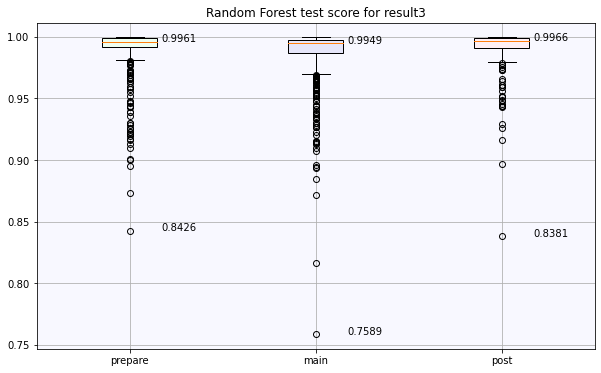

In [73]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(facecolor='ghostwhite')
bp = ax.boxplot([lgbm_met[5], lgbm_met2[5], lgbm_met3[5]], patch_artist=True)
colors=['honeydew','lavender','lavenderblush']
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

plt.text(1.17,np.median(lgbm_met[5]),format(np.median(lgbm_met[5]),'.4f'))
plt.text(2.17,np.median(lgbm_met2[5]),format(np.median(lgbm_met2[5]),'.4f'))
plt.text(3.17,np.median(lgbm_met3[5]),format(np.median(lgbm_met3[5]),'.4f'))
plt.text(1.17,min(lgbm_met[5]),format(min(lgbm_met[5]),'.4f'))
plt.text(2.17,min(lgbm_met2[5]),format(min(lgbm_met2[5]),'.4f'))
plt.text(3.17,min(lgbm_met3[5]),format(min(lgbm_met3[5]),'.4f'))

plt.title('Random Forest test score for result3')
plt.xticks([1,2,3],['prepare','main','post'])
plt.grid(True)
plt.show()

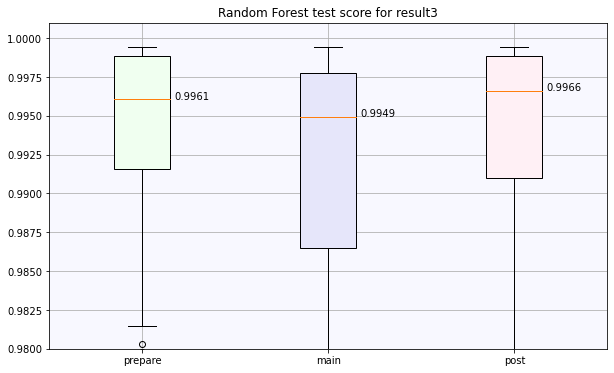

In [74]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(facecolor='ghostwhite')
bp = ax.boxplot([lgbm_met[5], lgbm_met2[5], lgbm_met3[5]], patch_artist=True)
colors=['honeydew','lavender','lavenderblush']
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

plt.text(1.17,np.median(lgbm_met[5]),format(np.median(lgbm_met[5]),'.4f'))
plt.text(2.17,np.median(lgbm_met2[5]),format(np.median(lgbm_met2[5]),'.4f'))
plt.text(3.17,np.median(lgbm_met3[5]),format(np.median(lgbm_met3[5]),'.4f'))


plt.title('Random Forest test score for result3')
plt.xticks([1,2,3],['prepare','main','post'])
ax.set_ylim(0.98,1.001)
plt.grid(True)
plt.show()